In [272]:
%matplotlib inline  

In [333]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [274]:
# upload chewy data
chewy = pd.read_csv('chewy_final.csv')

In [275]:
pd.set_option('display.max_columns', 50) 
chewy.head(20)

,food_form,rating,weight,lifestage,cost,food_texture,size,category,fish_type,dimensions,special_diet,toy_feature,product_name,item_number,litter_and_bedding_type,small_pet_type,brand,material,no_reviews,litter_box_type,old_cost,supplement_form,reptile_type,bowl_feature,bed_type,made_in,product_description,leash_and_collar_feature,bird_type,breed_size,page,percent_rec
0,NaN,4.0,NaN,"adult,_all_stages",$26.99,NaN,"30-count, 75mg",Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,Vetoquinol,93443,NaN,NaN,vet_solutions,NaN,50,NaN,$34.95,tablet/capsule,NaN,NaN,NaN,united_states,Vetoquinol Zylkene Nutritional Supplement Caps...,NaN,NaN,NaN,1,79
1,NaN,4.6,2.08ounces,all_stages,$12.71,NaN,None,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,Nordic Naturals,50590,NaN,NaN,NaN,NaN,48,NaN,$14.95,liquid,NaN,NaN,NaN,united_states,Nordic Naturals Omega-3 Pet Cats & Small Breed...,NaN,NaN,"extra_small,_small",1,96
2,NaN,4.3,8ounces,"adult,_all_stages",$23.99,NaN,8-oz bottle,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,Oratene,83085,NaN,NaN,zymox,NaN,93,NaN,$36.99,liquid,NaN,NaN,NaN,NaN,Oratene Brushless Oral Care Water Additive for...,NaN,NaN,NaN,1,91
3,NaN,4.5,NaN,"all_stages,_adult",$14.19,NaN,None,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,VetriScience,57622,NaN,NaN,NaN,NaN,99,NaN,$19.99,powdered,NaN,NaN,NaN,united_states,VetriScience Perio Support Everyday Health Dog...,NaN,NaN,NaN,1,96
4,NaN,4.7,NaN,kitten,$3.59,NaN,None,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,Whiskas,81469,NaN,NaN,NaN,NaN,52,NaN,$5.32,liquid,NaN,NaN,NaN,NaN,"Whiskas Cat Milk, 6.75-oz carton, 3-pack",NaN,NaN,NaN,1,92
5,NaN,4.5,NaN,adult,$24.99,NaN,None,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,Nutramax,50684,NaN,NaN,dasuquin,NaN,70,NaN,$29.99,tablet/capsule,NaN,NaN,NaN,united_states,"Nutramax Dasuquin Joint Health Cat Supplement,...",NaN,NaN,NaN,1,93
6,NaN,4.9,NaN,"kitten,_all_stages",$2.89,NaN,11-oz can,Cat Vitamins & Supplements,NaN,NaN,NaN,NaN,PetAg,97831,NaN,NaN,NaN,NaN,30,NaN,$7.99,liquid,NaN,NaN,NaN,united_states,PetAg KMR Kitten Milk Replacer Liquid,NaN,NaN,NaN,1,100
7,dry_food,4.9,8.8pounds,adult,$39.09,NaN,None,Cat Food,NaN,NaN,"sensitive_digestion,_prescription_food",NaN,Royal Canin Veterinary Diet,48747,NaN,NaN,royal_canin,NaN,272,NaN,$45.99,NaN,NaN,NaN,NaN,united_states,Royal Canin Veterinary Diet Gastrointestinal F...,NaN,NaN,NaN,1,99
8,dry_food,4.7,12.0pounds,"all_stages,_kitten,_adult",$58.99,NaN,12-lb bag,Cat Food,NaN,NaN,"gmo-free,_no_corn_no_wheat_no_soy,_grain-free,...",NaN,Orijen,101301,NaN,NaN,NaN,NaN,731,NaN,None,NaN,NaN,NaN,NaN,united_states,Orijen Cat & Kitten Grain-Free Dry Cat Food,NaN,NaN,"all_breeds,_small,_medium,_large",1,94
9,wet_food,4.6,5.3pounds,"all_stages,_adult",$13.57,flaked,None,Cat Food,NaN,NaN,NaN,NaN,Fancy Feast,76055,NaN,NaN,purina,NaN,138,NaN,$15.99,NaN,NaN,NaN,NaN,united_states,Fancy Feast Flaked Fish & Shrimp Feast Canned ...,NaN,NaN,NaN,1,94


In [371]:
cols = ['item_number', 'pet',
       'category',
        'page',
        'brand',
        'product_name',
        'product_description',
        'no_reviews',
        'rating',
        'percent_rec',
        'cost',
        'old_cost',
        'sale',
        'food_form',
        'food_texture',
        'special_diet',
        'supplement_form',
        'weight',
        'size',
        'lifestage',
        'breed_size',
        'fish_type',
        'bird_type',
        'reptile_type',
        'small_pet_type',
        'made_in',
        'material',
       'toy_feature',
       'bowl_feature',
       'leash_and_collar_feature',
       'litter_box_type',
       'litter_and_bedding_type',
       'bed_type']
chewy = chewy[cols]

In [473]:
chewy.dtypes

item_number                   int64
pet                          object
category                     object
page                          int64
brand                        object
product_name                 object
product_description          object
no_reviews                  float64
rating                      float64
percent_rec                 float64
cost                        float64
old_cost                    float64
sale                        float64
food_form                    object
food_texture                 object
special_diet                 object
supplement_form              object
weight                      float64
size                         object
lifestage                    object
breed_size                   object
fish_type                    object
bird_type                    object
reptile_type                 object
small_pet_type               object
made_in                      object
material                     object
toy_feature                 

In [278]:
for x in chewy.category.unique():
    print x

Cat Vitamins & Supplements
Cat Food
Dog Beds & Mats
Dog Crates, Pens & Gates
Dog Dental & Healthcare
Dog Cleaning & Potty
Small Pet Beds, Hideouts & Toys
Bird Perches & Toys
Dog Toys
Reptile Food & Treats
Cat Toys
Dog Treats
Dog Food
Small Pet Food & Treats
Cat Treats
Fish Food & Treats
Bird Food & Treats
Dog Vitamins & Supplements
Dog Flea & Tick
Dog Bowls & Feeders
Gifts & Books
Dog Leashes & Collars
Dog Apparel & Accessories
Cat Litter & Accessories
Dog Technology
Dog Training & Behavior
Dog Grooming
Dog Travel & Car
Cat Flea & Tick
Cat Beds & Mats
Cat Training & Cleaning
Cat Crates, Pens & Gates
Cat Dental & Healthcare
Cat Leashes & Collars
Cat Trees, Condos & Scratchers
Small Pet Supplies
Fish Supplies
Reptile Supplies
Horse
Bird Supplies
Cat Bowls & Feeders
Cat Grooming


In [279]:
print chewy.fish_type.unique()
print chewy.bird_type.unique()
print chewy.small_pet_type.unique()
print chewy.reptile_type.unique()

[nan 'tropical_freshwater' 'goldfish' 'goldfish,_koi_and_pond_fish'
 'cichlid,_tropical_freshwater' 'betta,_tropical_freshwater'
 'tropical_freshwater,_marine_fish' 'marine_fish,_tropical_freshwater'
 'koi_and_pond_fish' 'bottom_feeder,_marine_fish,_tropical_freshwater'
 'bottom_feeder,_tropical_freshwater' 'marine_fish'
 'bottom_feeder,_goldfish,_tropical_freshwater'
 'goldfish,_marine_fish,_tropical_freshwater'
 'cichlid,_betta,_tropical_freshwater' 'tropical_freshwater,_cichlid'
 'betta,_bottom_feeder,_cichlid,_discus,_goldfish,_koi_and_pond_fish'
 'cichlid,_tropical_freshwater,_discus' 'betta'
 'tropical_freshwater,_goldfish' 'tropical_freshwater,_cichlid,_discus'
 'koi_and_pond_fish,_marine_fish,_tropical_freshwater'
 'betta,_bottom_feeder,_cichlid,_discus,_goldfish,_koi_and_pond_fish,_marine_fish,_tropical_freshwater'
 'all_fish'
 'bottom_feeder,_cichlid,_discus,_goldfish,_marine_fish,_marine_invertebrate,_tropical_freshwater'
 'tropical_freshwater,_marine_invertebrate,_marine_fi

In [280]:
chewy.breed_size.unique()

array([nan, 'extra_small,_small', 'all_breeds,_small,_medium,_large',
       'giant', 'all_breeds', 'medium', 'large,_giant', 'medium,_large',
       'large', 'extra_small', 'small,_extra_small', 'large,_medium',
       'giant,_large', 'extra_small,_small,_medium',
       'extra_small,_small,_medium,_large,_giant', 'small',
       'small,_medium', 'small,_medium,_large,_all_breeds',
       'all_breeds,_large,_medium,_small', 'small,_medium,_large',
       'all_breeds,_extra_small,_small,_medium,_large',
       'extra_small,_small,_medium,_large,_giant,_all_breeds',
       'small,_medium,_large,_giant',
       'all_breeds,_small,_extra_small,_medium,_large',
       'giant,_large,_medium,_small', 'medium,_large,_giant',
       'medium,_small', 'small,_medium,_all_breeds,_large',
       'giant,_medium,_large', 'small,_extra_small,_all_breeds',
       'large,_giant,_medium', 'small,_large,_medium,_all_breeds',
       'small,_extra_small,_medium', 'large,_small,_medium,_all_breeds',
       

In [281]:
len(chewy.item_number.unique())

14198

In [282]:
chewy.cost = chewy.cost.str.replace('$', '')
chewy.cost = chewy.cost.astype(float)

chewy.old_cost = chewy.old_cost.str.replace('$', '')
chewy.old_cost = chewy.old_cost.replace('None', np.nan)
chewy.old_cost = chewy.old_cost.astype(float)

chewy.item_number = chewy.item_number.astype(str)
chewy.page = chewy.page.astype(str)

chewy.describe()

,rating,cost,old_cost,percent_rec
count,14198.000000,14198.000000,12247.000000,14198.000000
mean,4.415094,21.622066,26.682885,89.290463
std,0.577310,23.605518,25.798391,14.459972
min,1.000000,0.590000,0.790000,9.000000
25%,4.200000,6.990000,10.575000,84.000000
50%,4.600000,13.795000,17.990000,95.000000
75%,4.800000,28.990000,34.990000,100.000000
max,5.000000,552.990000,439.950000,100.000000


In [283]:
chewy['size'] = chewy['size'].replace('None', np.nan)

chewy['no_reviews'] = chewy['no_reviews'].replace('None', '')


In [284]:
for x in range(len(chewy.weight)):
    if 'pound' in chewy.weight.astype(str)[x]:
        chewy.weight[x] = chewy.weight.astype(str)[x].replace('pounds', '')

for x in range(len(chewy.weight)):
    if 'ounce' in chewy.weight.astype(str)[x]:
        chewy.weight[x] = float(chewy.weight.astype(str)[x].replace('ounces', ''))/16.0

chewy.weight = chewy.weight.astype(float)

C:\Users\skick\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\skick\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [285]:
chewy.drop('dimensions', 1, inplace = True)

In [286]:
chewy['sale'] = (chewy.old_cost-chewy.cost)/chewy.old_cost
chewy['sale'] = chewy.sale*100
chewy.sale = chewy.sale.apply(lambda x: round(x,2))
chewy.sale = chewy.sale.astype(float)

In [303]:
chewy['no_reviews'] = chewy['no_reviews'].replace('', np.nan )
chewy.no_reviews = chewy.no_reviews.astype(float)

In [373]:
chewy['pet'] = chewy['category'].apply(lambda x: x.split(' ')).apply(lambda x: x[0])
chewy.pet = chewy.pet.replace("Small", "Small Pet")
chewy.pet = chewy.pet.replace("Gifts", np.nan)


chewy.pet.unique()

array(['Cat', 'Dog', 'Small Pet', 'Bird', 'Reptile', 'Fish', nan, 'Horse'], dtype=object)

In [470]:
chewy.percent_rec = chewy.percent_rec.astype(float)

In [415]:
chewy['item_type'] = chewy['category'].apply(lambda x: x.split(' ')).apply(lambda x: x[1:])
chewy['item_type'] = chewy['item_type'].apply(lambda x: ' '.join(x))

chewy.item_type.unique()

In [426]:
for x in chewy.item_type.unique():
    print x

Food & Treats
Dental & Healthcare
Vitamins & Supplements
Litter & Accessories
Flea & Tick
Training & Cleaning
Toys
Travel & Car
Bowls & Feeders
Leashes & Collars
Grooming
Beds & Mats
Crates, Pens & Gates
Trees, Condos & Scratchers
Apparel & Accessories
Technology
Gifts & Books
Supplies
Beds, Hiedouts & Toys
Perches & Toys



In [425]:
chewy.item_type.replace('& Books', 'Gifts & Books', inplace = True)
chewy.item_type.replace('Pet Food & Treats', 'Food & Treats', inplace = True)
chewy.item_type.replace('Pet Supplies', 'Supplies', inplace = True)
chewy.item_type.replace('Pet Beds, Hideouts & Toys', 'Beds, Hiedouts & Toys', inplace = True)

chewy.item_type.replace('Treats', 'Food & Treats', inplace = True)
chewy.item_type.replace('Food', 'Food & Treats', inplace = True)

chewy.item_type.replace('Training & Behavior', 'Training & Cleaning', inplace = True)
chewy.item_type.replace('Cleaning & Potty', 'Training & Cleaning', inplace = True)

In [435]:
sorted(chewy.brand.unique())

[nan,
 '8in1',
 'adaptil',
 'addiction',
 'advanced_oral_care',
 'ani_mate',
 'ani_mate,_dog_mate',
 'arm_and_hammer',
 'bayer',
 'bayer,_dvm',
 'before_grain',
 'beyond',
 "bird_lover's_blend",
 'blackwood',
 'blue_basics',
 'blue_freedom',
 'blue_life_protection',
 'blue_wilderness',
 'breath-less',
 "breeder's_choice",
 'canine_caviar',
 "cat's_pride",
 'cats_in_the_kitchen',
 'ceva',
 'chasing_our_tails',
 'coastal_pet_products',
 'cosequin',
 'cosequin,_dasuquin',
 'dasuquin',
 'dechra',
 'denamarin',
 'denosyl',
 'dog_fashion_living',
 'dog_mate,_ani_mate',
 'dog_rocks',
 'dogswell',
 'dvm,_bayer',
 'earthbath',
 'earthborn_holistic',
 'encore',
 'etta_says!',
 'felidae',
 'feliway',
 'ferrera_farms',
 'fido_pet_products',
 'firstmate',
 'four_paws',
 'garden_chic!',
 'good_buddy',
 'gray_muzzle',
 'hagen',
 'hartz',
 'hi-tek_rations',
 "hill's",
 "hill's,_science_diet",
 'hillside_farms',
 'hueter_toledo',
 'instinct',
 'kong',
 'kyjen',
 'kyjen,_dog_games',
 'lambert_kay',
 'li

In [471]:
chewy = chewy.sort_values('item_number')
chewy

,item_number,pet,category,page,brand,product_name,product_description,no_reviews,rating,percent_rec,cost,old_cost,sale,food_form,food_texture,special_diet,supplement_form,weight,size,lifestage,breed_size,fish_type,bird_type,reptile_type,small_pet_type,made_in,material,toy_feature,bowl_feature,leash_and_collar_feature,litter_box_type,litter_and_bedding_type,bed_type,item_type
1999,46682,Cat,Cat Food,44,breeder's_choice,AvoDerm,AvoDerm Natural Grain-Free Chicken & Duck Entr...,NaN,3.3,56.0,23.89,27.49,13.10,wet_food,minced,grain-free,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
2133,46683,Cat,Cat Food,31,breeder's_choice,AvoDerm,"AvoDerm Natural Grain-Free Sardine, Shrimp & C...",29.0,4.4,93.0,24.49,28.99,15.52,wet_food,flaked,grain-free,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
2197,46684,Cat,Cat Food,26,breeder's_choice,AvoDerm,AvoDerm Natural Grain-Free Chicken Chunks Entr...,41.0,4.0,75.0,24.49,30.99,20.97,wet_food,chunks_in_gravy,grain-free,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
1170,46685,Cat,Cat Food,28,breeder's_choice,AvoDerm,AvoDerm Natural Chicken Formula Canned Cat Foo...,24.0,4.6,95.0,35.99,40.65,11.46,wet_food,pate,NaN,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
1502,46686,Cat,Cat Food,41,breeder's_choice,AvoDerm,AvoDerm Natural Grain-Free Salmon & Chicken En...,NaN,4.3,75.0,24.49,27.49,10.91,wet_food,minced,grain-free,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
7425,46688,Dog,Dog Food,53,breeder's_choice,AvoDerm,AvoDerm Natural Lamb Meal & Rice Formula Canne...,11.0,4.9,100.0,24.49,28.07,12.75,wet_food,pate,NaN,NaN,NaN,NaN,"adult,_all_stages","all_breeds,_small,_medium,_large",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
3670,46689,Dog,Dog Dental & Healthcare,32,breeder's_choice,AvoDerm,AvoDerm Natural Rice & Chicken Formula Weight ...,NaN,4.5,75.0,28.39,29.88,4.99,wet_food,pate,weight_control,NaN,NaN,NaN,adult,"all_breeds,_small,_medium,_large",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dental & Healthcare
7468,46690,Dog,Dog Food,54,breeder's_choice,AvoDerm,AvoDerm Natural Vegetarian Formula Adult Canne...,NaN,5.0,100.0,24.49,29.99,18.34,wet_food,pate,vegetarian,NaN,NaN,NaN,adult,"all_breeds,_small,_medium,_large",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
8051,46691,Dog,Dog Food,65,breeder's_choice,AvoDerm,AvoDerm Natural Original Formula Canned Dog Fo...,NaN,5.0,100.0,27.49,28.07,2.07,wet_food,pate,NaN,NaN,NaN,NaN,"adult,_all_stages","all_breeds,_small,_medium,_large",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats
1324,46692,Cat,Cat Food,34,breeder's_choice,AvoDerm,AvoDerm Natural Grain-Free Tuna & Chicken Entr...,19.0,4.7,100.0,24.49,26.98,9.23,wet_food,flaked,grain-free,NaN,NaN,NaN,"adult,_all_stages",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Treats


In [472]:
chewy.to_csv('chewy_update.csv')

# Processing Complete! (for now...)

### If have more time:
create pet_type column (cat, dog, horse, fish, etc)


create_species type or something similar


fix brands





In [315]:
chewy = pd.read_csv('chewy_update.csv')

In [316]:
chewy.category.value_counts()

Dog Food                           2309
Cat Food                           1981
Dog Treats                         1828
Dog Toys                           1222
Dog Dental & Healthcare            1159
Dog Grooming                        583
Cat Toys                            432
Cat Vitamins & Supplements          427
Dog Bowls & Feeders                 388
Dog Leashes & Collars               356
Dog Cleaning & Potty                302
Cat Treats                          298
Dog Crates, Pens & Gates            275
Dog Beds & Mats                     247
Fish Supplies                       240
Bird Food & Treats                  217
Small Pet Food & Treats             182
Dog Flea & Tick                     169
Dog Travel & Car                    166
Cat Litter & Accessories            147
Dog Training & Behavior             132
Small Pet Supplies                  131
Reptile Supplies                    108
Fish Food & Treats                  100
Cat Trees, Condos & Scratchers       95


(array([  1.20000000e+01,   1.00000000e+00,   8.00000000e+00,
          7.00000000e+00,   9.00000000e+00,   4.00000000e+01,
          6.10000000e+01,   3.90000000e+01,   6.90000000e+01,
          7.90000000e+01,   3.36000000e+02,   3.74000000e+02,
          2.37000000e+02,   7.28000000e+02,   2.60000000e+02,
          1.19500000e+03,   1.38200000e+03,   1.94900000e+03,
          4.29600000e+03,   3.11600000e+03]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
         3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 20 Patch objects>)

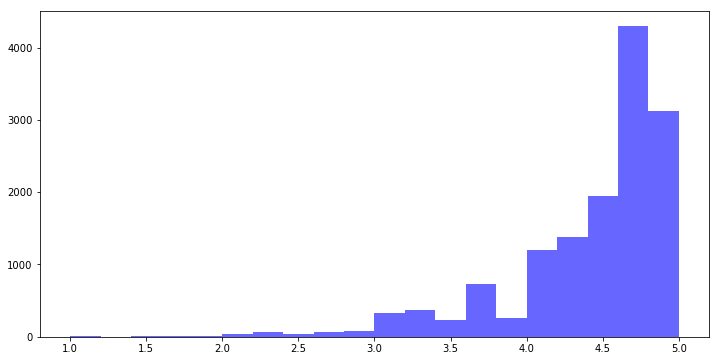

In [317]:
plt.figure(figsize = (12,6))
plt.hist(chewy.rating, bins = 20, color = "#6767ff")

(array([  2.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          9.00000000e+00,   2.90000000e+01,   1.00000000e+01,
          8.00000000e+01,   1.20000000e+01,   3.80000000e+01,
          3.20000000e+01,   1.50000000e+01,   4.16000000e+02,
          6.60000000e+01,   6.80000000e+01,   1.88000000e+02,
          4.70000000e+02,   1.28000000e+02,   2.61000000e+02,
          6.10000000e+02,   5.10000000e+02,   7.99000000e+02,
          1.21400000e+03,   1.11000000e+03,   1.87200000e+03,
          6.24900000e+03]),
 array([   9.  ,   12.64,   16.28,   19.92,   23.56,   27.2 ,   30.84,
          34.48,   38.12,   41.76,   45.4 ,   49.04,   52.68,   56.32,
          59.96,   63.6 ,   67.24,   70.88,   74.52,   78.16,   81.8 ,
          85.44,   89.08,   92.72,   96.36,  100.  ]),
 <a list of 25 Patch objects>)

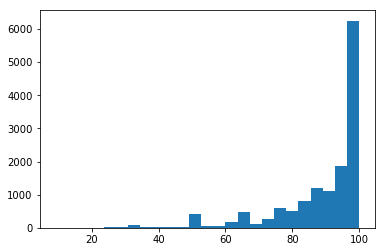

In [238]:
plt.hist(chewy.percent_rec, bins = 25)

[0, 200, 0, 4000]

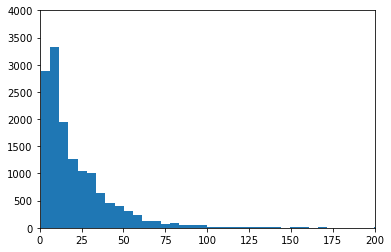

In [250]:
plt.hist(chewy.cost, bins = 100)
plt.axis([0,200,0,4000])

[0, 200, 0, 2200]

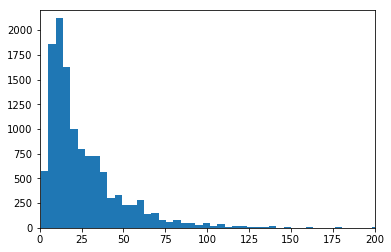

In [254]:
plt.hist(chewy['old_cost'].dropna(), bins = 100)
plt.axis([0,200,0,2200])

[0, 100, 0, 900]

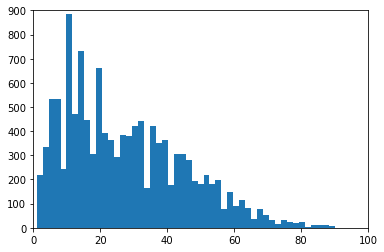

In [258]:
plt.hist(chewy['sale'].dropna(), bins = 50)
plt.axis([0,100,0,900])

(array([  2.34900000e+03,   5.02000000e+02,   7.43000000e+02,
          1.68000000e+02,   1.50000000e+01,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1.25000000e-03,   1.01011250e+01,   2.02010000e+01,
          3.03008750e+01,   4.04007500e+01,   5.05006250e+01,
          6.06005000e+01,   7.07003750e+01,   8.08002500e+01,
          9.09001250e+01,   1.01000000e+02]),
 <a list of 10 Patch objects>)

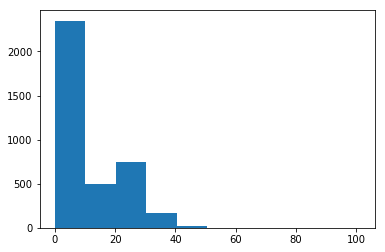

In [288]:
plt.hist(chewy['weight'].dropna())
# plt.axis([0,200,0,2200])

[0, 500, 0, 4000]

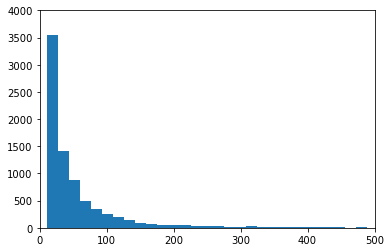

In [329]:
plt.hist(chewy['no_reviews'].dropna(), bins = 100)
plt.axis([0,500,0,4000])

# Scatter Plots

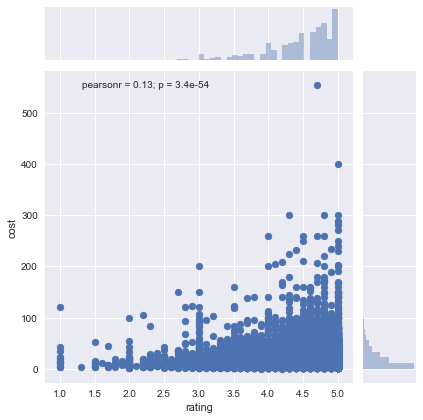

In [341]:
plt.figure(figsize=(12, 6))
sns.jointplot(chewy.rating, chewy.cost)

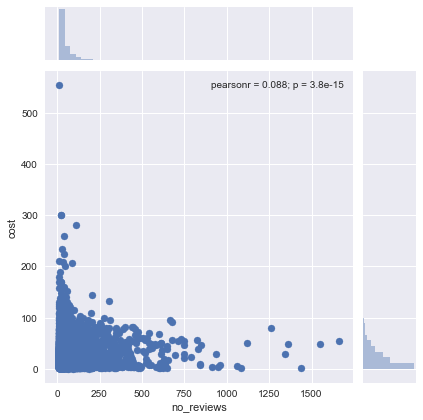

In [342]:
sns.jointplot(chewy.no_reviews, chewy.cost)

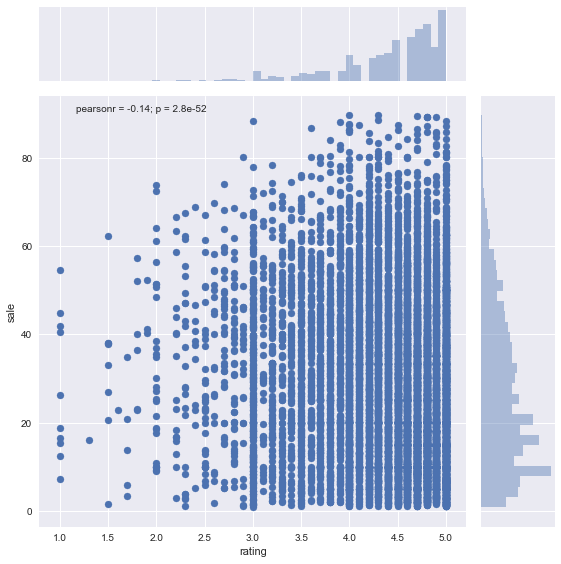

In [345]:
sns.jointplot(chewy.rating, chewy.sale, size = 8,)

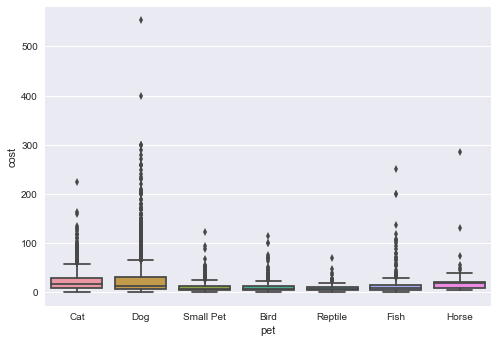

In [377]:
sns.boxplot(x='pet', y='cost', data=chewy)

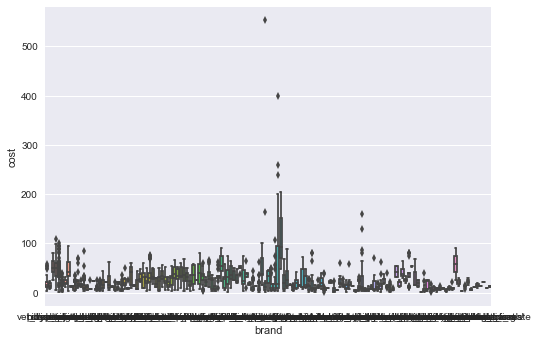

In [348]:
sns.boxplot(x='brand', y='cost', data=chewy)

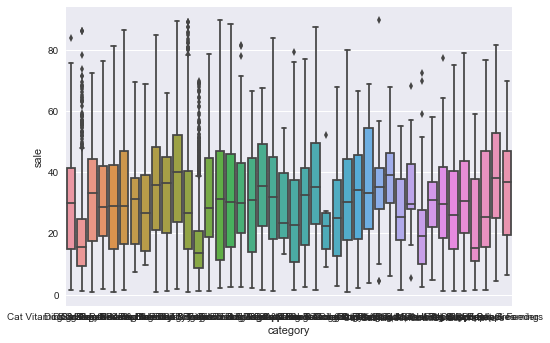

In [349]:
sns.boxplot(x='category', y='sale', data=chewy)

In [ ]:
sns.boxplot(x='category', y='sale', data=chewy)

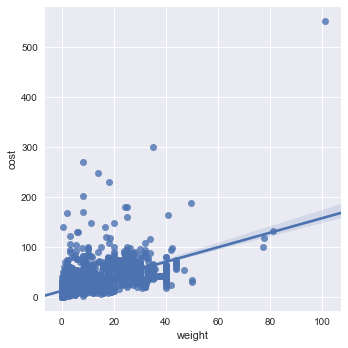

In [350]:
sns.lmplot("weight", "cost", chewy)

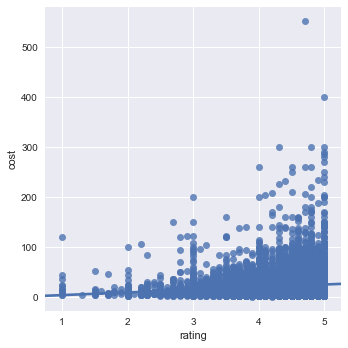

In [351]:
sns.lmplot("rating", "cost", chewy)

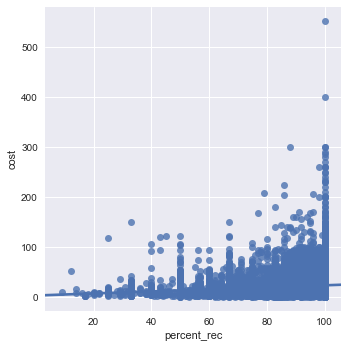

In [352]:
sns.lmplot("percent_rec", "cost", chewy)

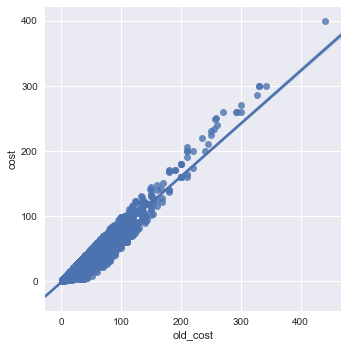

In [353]:
sns.lmplot("old_cost", "cost", chewy)

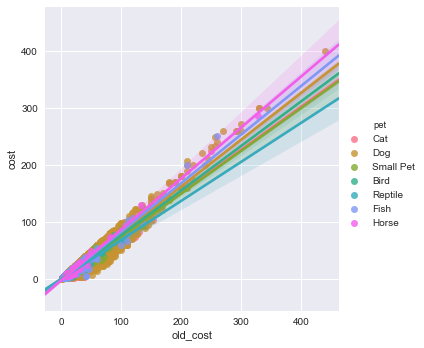

In [378]:
sns.lmplot("old_cost", "cost", chewy, hue = "pet")

In [ ]:
sns.lmplot("weight", "cost", chewy)

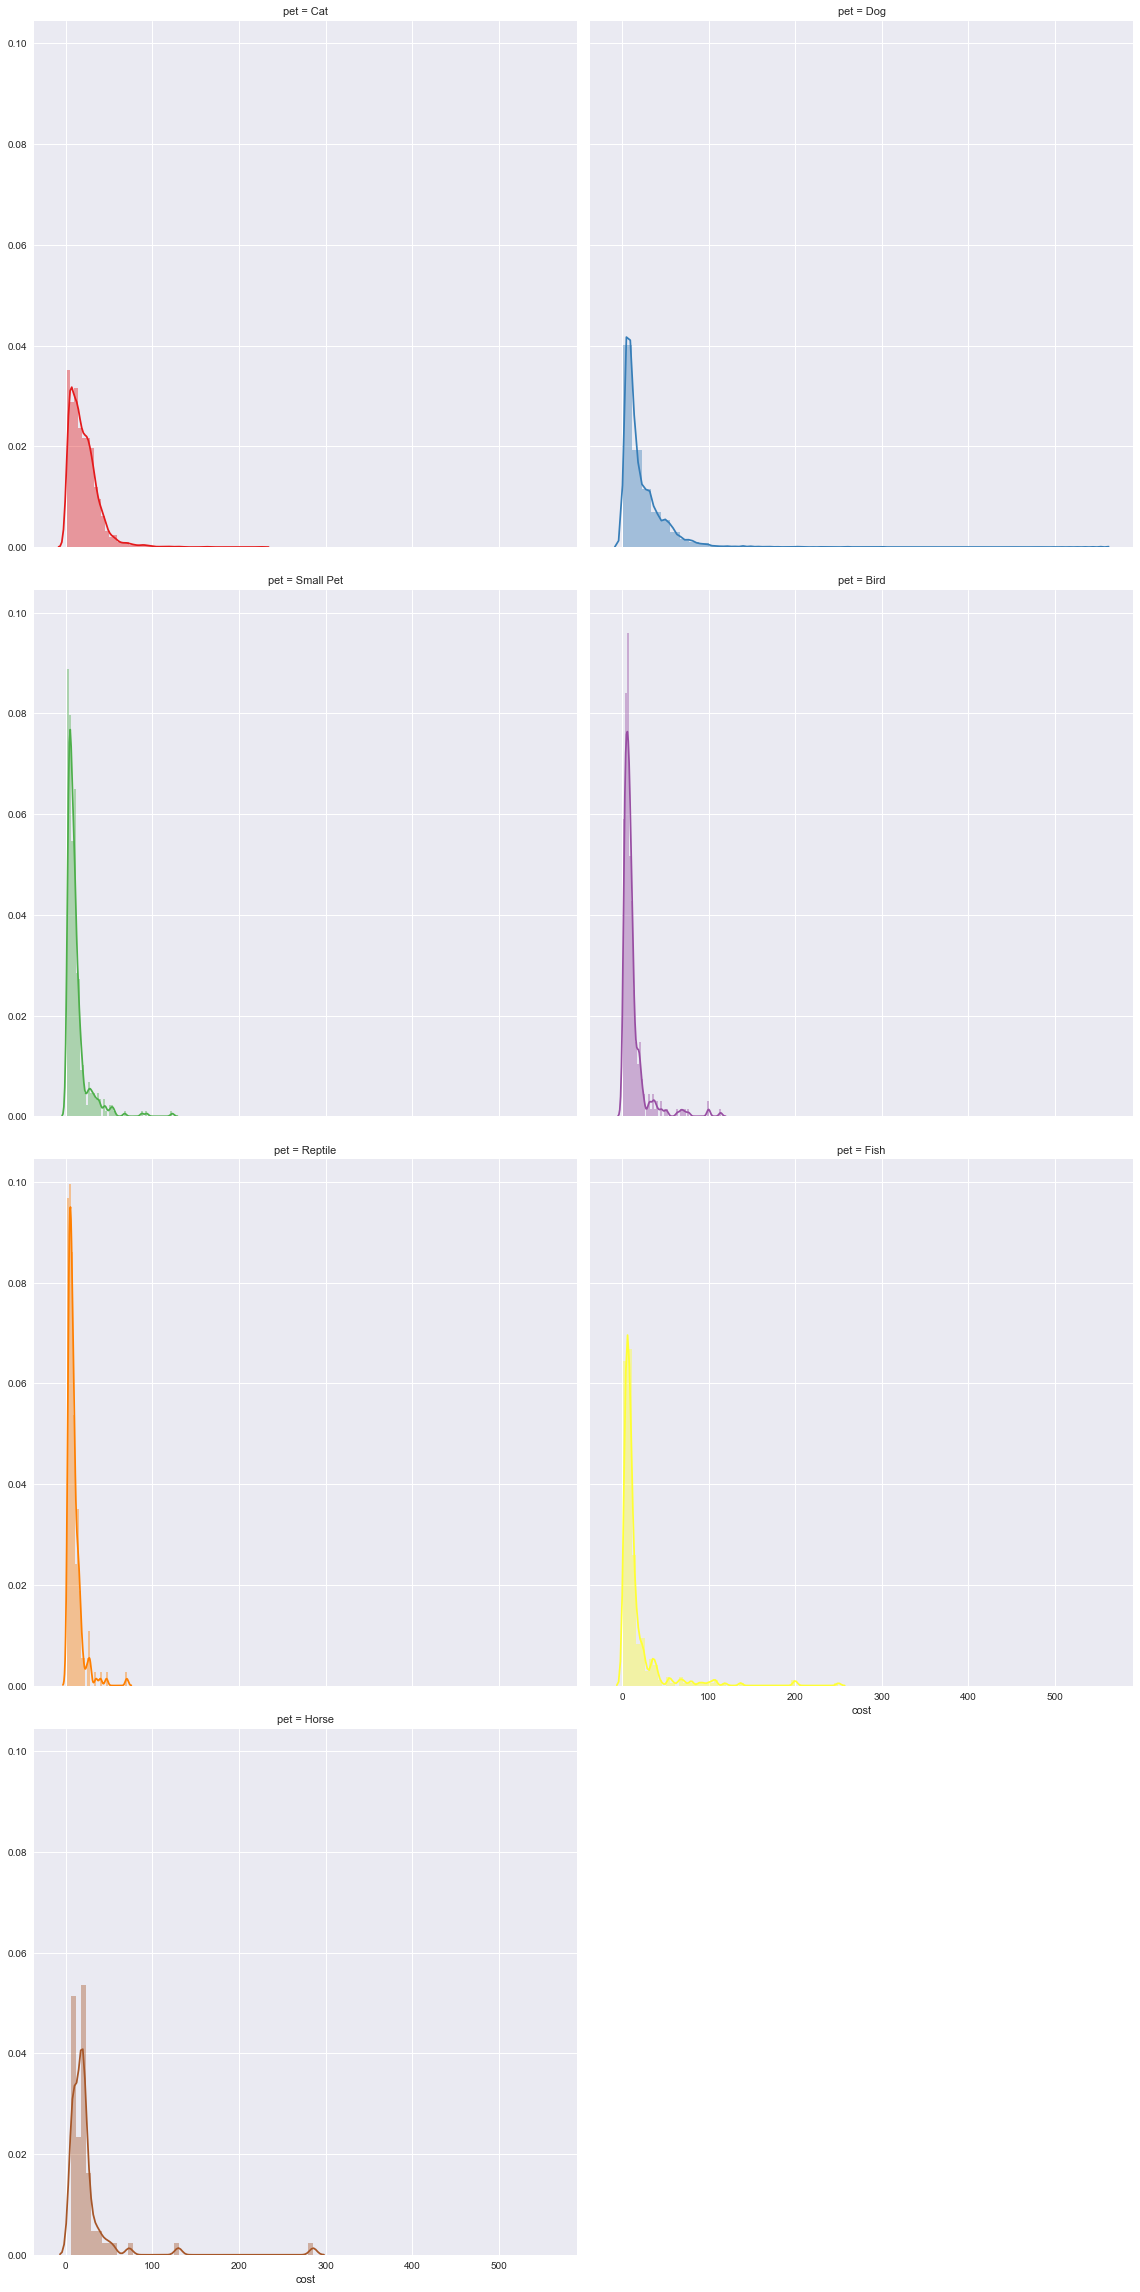

In [382]:
PetGrid = sns.FacetGrid(chewy, col='pet', hue="pet", palette="Set1", size=8, col_wrap = 2)
PetGrid.map(sns.distplot, "cost")  

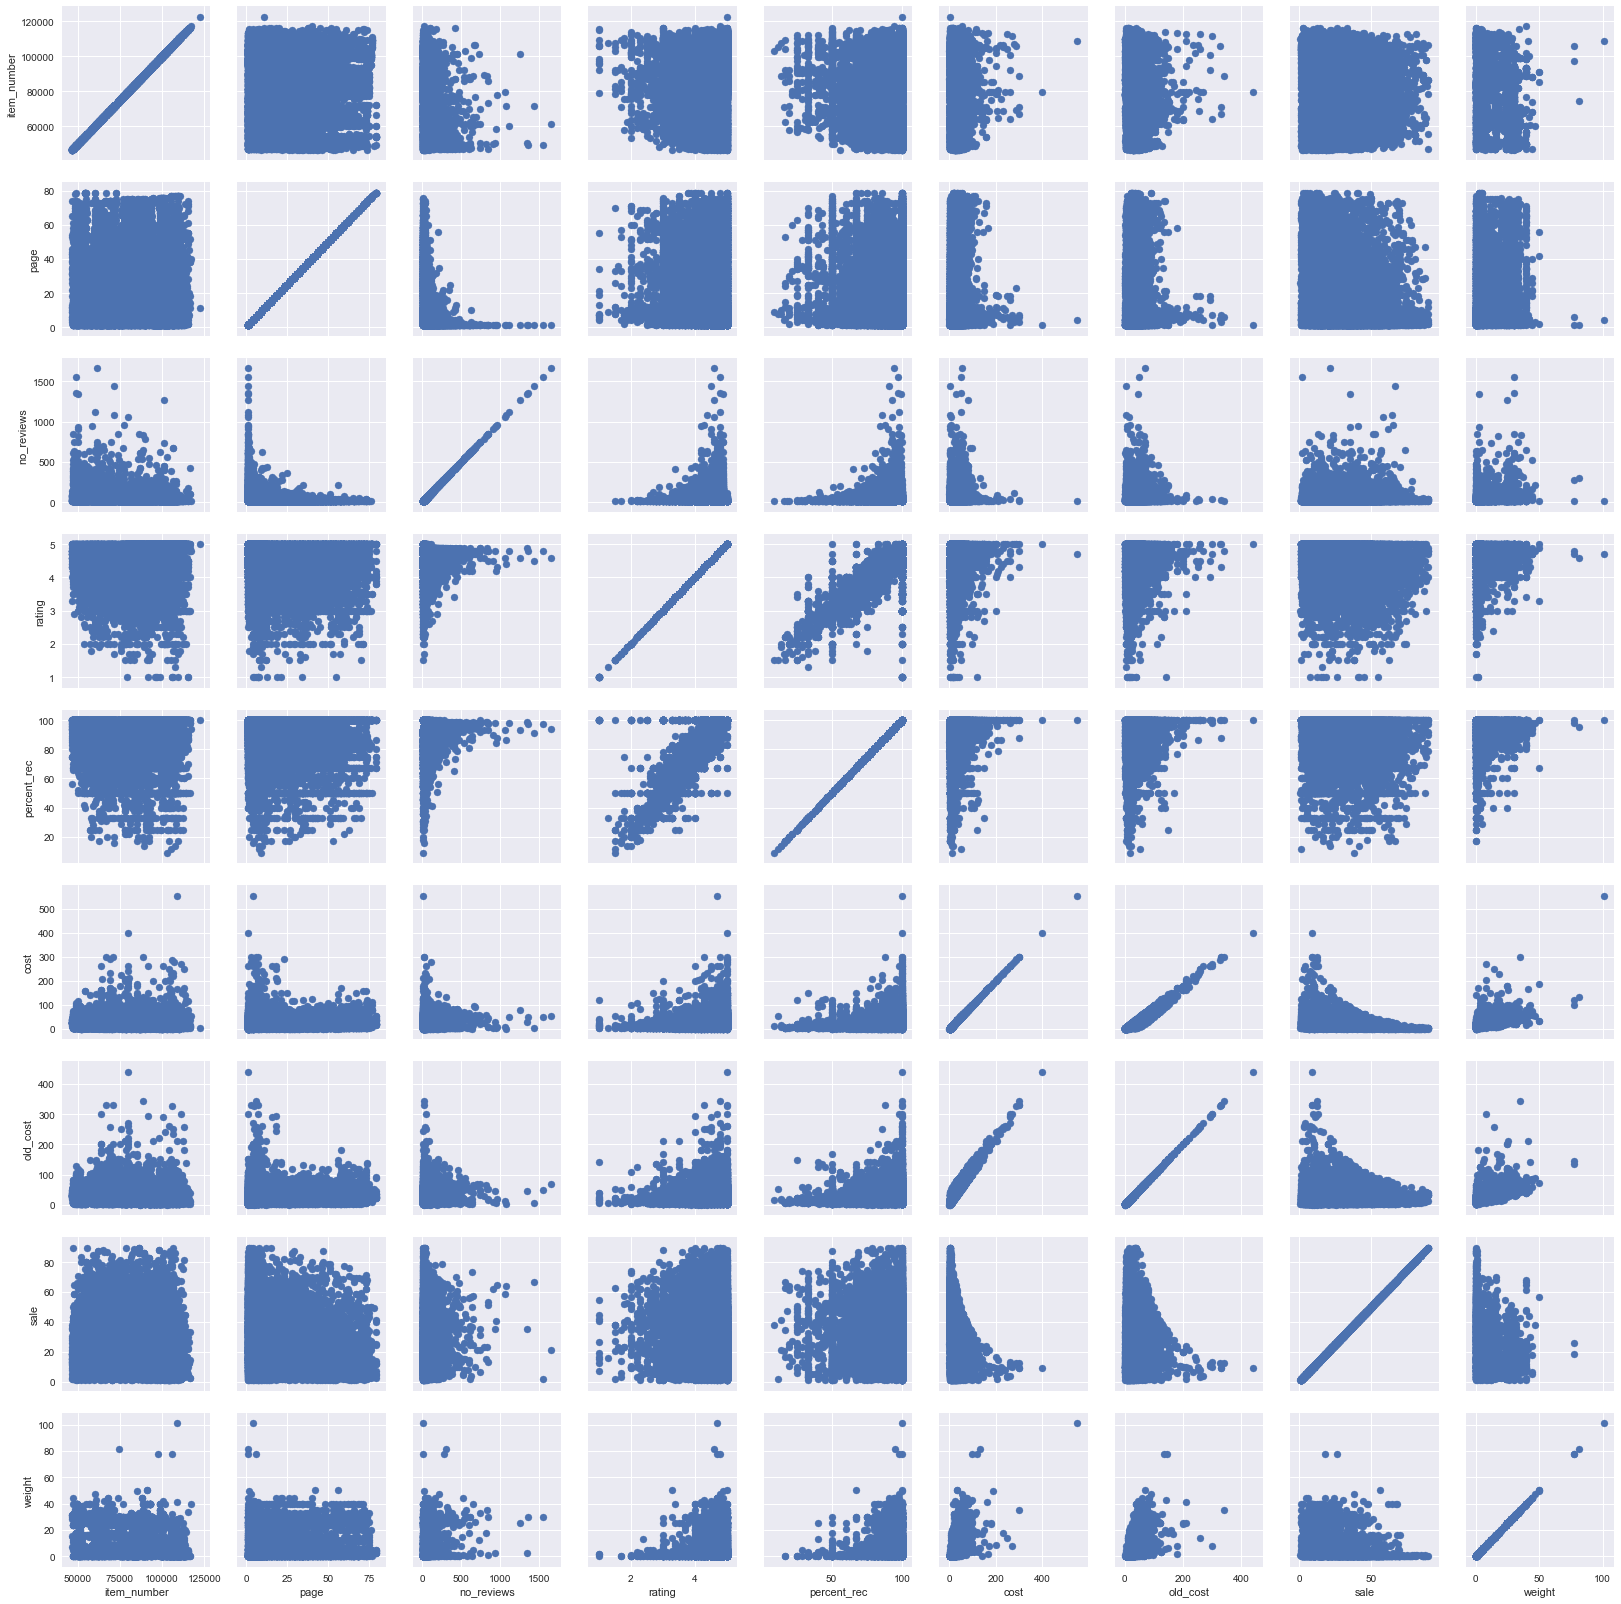

In [387]:
tipGrid = sns.PairGrid(chewy)
tipGrid.map(plt.scatter)

# supposed to add , scatter_kws={'alpha':0.3} to args to get transparency

In [ ]:
chewy_subset = chewy

## Groupby Vis


In [395]:
chewy.groupby('pet').agg(['mean', 'min', 'max'])

item_number                       page         no_reviews        \
                 mean     min     max       mean min max       mean   min   
pet                                                                         
Bird            99546   94618  113361   4.109635   1  11  18.218750  11.0   
Cat             78723   46682  122571  18.022721   1  58  53.988245  11.0   
Dog             79311   46688  117179  23.252771   1  79  63.440377  11.0   
Fish            99697   94254  110117   6.014706   1  19  16.533333  11.0   
Horse          107753  105817  115638   3.222222   1   7        NaN   NaN   
Reptile         99087   94251  105677   2.809524   1   8  14.666667  11.0   
Small Pet       98644   73679  110692   4.809392   1  15  21.442308  11.0   

                     rating           percent_rec                cost        \
              max      mean  min  max        mean min  max       mean   min   
pet                                                                           
Bird         40.0  4.499003  1.0  5.0   92.305648  25  100  12.000864  1.24   
Cat        1436.0  4.343717  1.0  5.0   87.563373   9  100  20.675163  0.82   
Dog        1659.0  4.425557  1.0  5.0   89.482514  14  100  23.069242  0.59   
Fish         41.0  4.642059  1.0  5.0   95.041176  25  100  16.514588  1.19   
Horse         NaN  4.687500  3.0  5.0   95.972222  50  100  24.382500  5.73   
Reptile      24.0  4.585119  1.0  5.0   94.333333  40  100   9.310774  1.85   
Small Pet    64.0  4.445580  1.0  5.0   90.168508  17  100  11.806381  1.69   

                    old_cost                     sale                  weight  \
              max       mean   min     max       mean   min    max       mean   
pet                                                                             
Bird       113.90  16.417799  1.99  134.14  31.911081  1.42  81.49   6.921694   
Cat        224.99  25.281537  1.19  249.99  25.703351  1.03  89.71   7.168706   
Dog        552.99  28.405469  0.79  439.95  27.831274  0.80  89.32  11.958860   
Fish       249.99  20.621287  1.88  259.03  30.058845  1.03  88.36   1.070000   
Horse      285.70  31.604444  7.99  327.07  24.058667  1.46  59.15   3.513519   
Reptile     70.47  13.718000  2.67   99.99  32.218429  1.14  79.18   0.222500   
Small Pet  122.96  16.691304  2.49  138.01  30.776988  1.09  78.61   6.292000   

                            
               min     max  
pet                         
Bird       0.50000   25.00  
Cat        0.00125   77.70  
Dog        0.00750  101.00  
Fish       1.07000    1.07  
Horse      0.25000   20.00  
Reptile    0.13000    0.50  
Small Pet  0.46000   25.00

pet
Bird         Axes(0.125,0.125;0.775x0.755)
Cat          Axes(0.125,0.125;0.775x0.755)
Dog          Axes(0.125,0.125;0.775x0.755)
Fish         Axes(0.125,0.125;0.775x0.755)
Horse        Axes(0.125,0.125;0.775x0.755)
Reptile      Axes(0.125,0.125;0.775x0.755)
Small Pet    Axes(0.125,0.125;0.775x0.755)
dtype: object

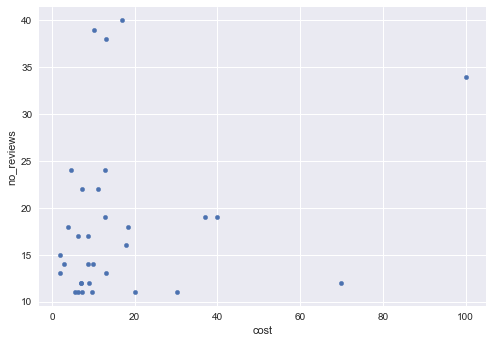

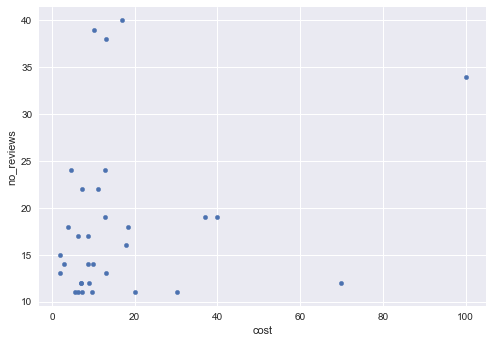

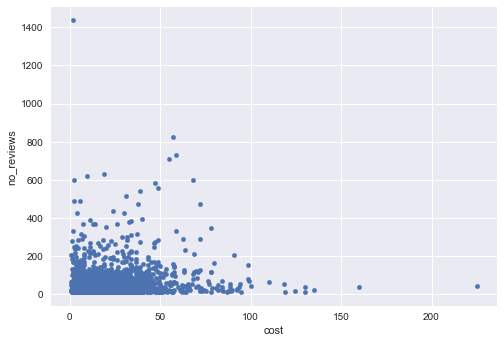

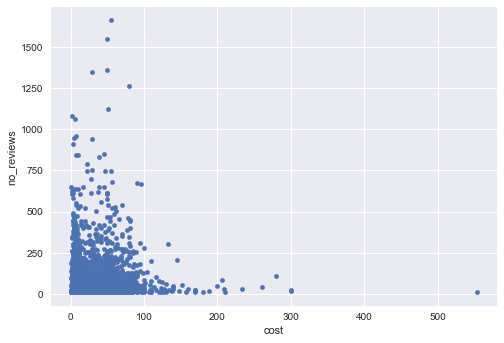

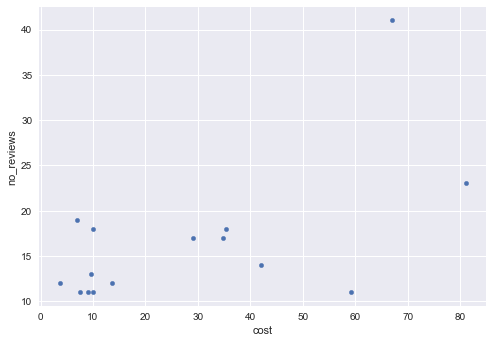

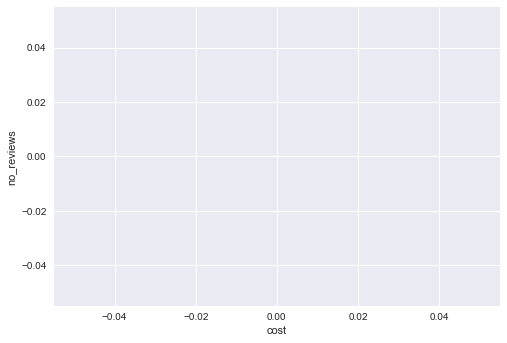

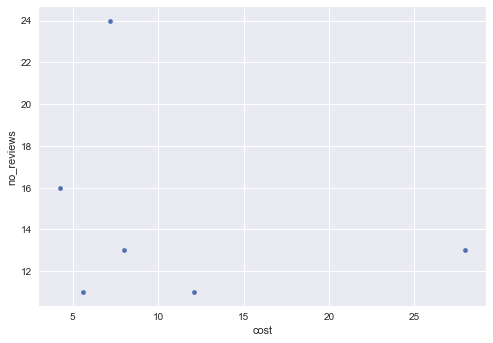

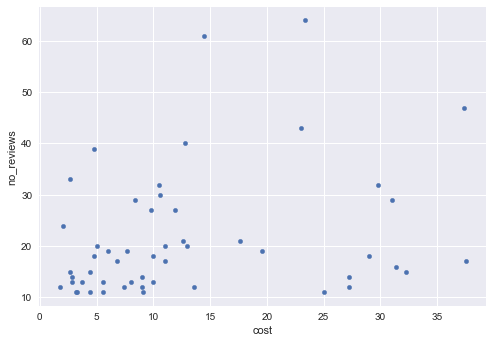

In [398]:
chewy.groupby('pet').plot.scatter('cost', 'no_reviews')

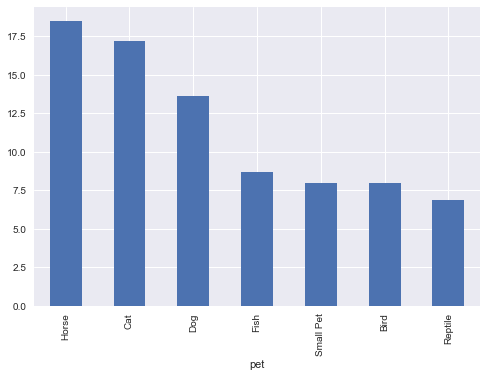

In [399]:
chewy.groupby('pet')['cost'].median().sort_values(ascending = False).plot.bar()

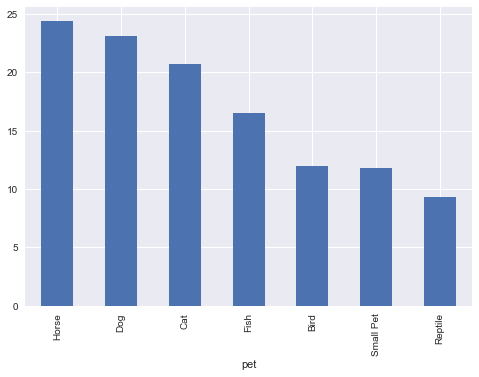

In [400]:
chewy.groupby('pet')['cost'].mean().sort_values(ascending = False).plot.bar()

In [405]:
# from scipy.stats import mode
# chewy.groupby('pet')['cost'].mode().sort_values(ascending = False).plot.bar()

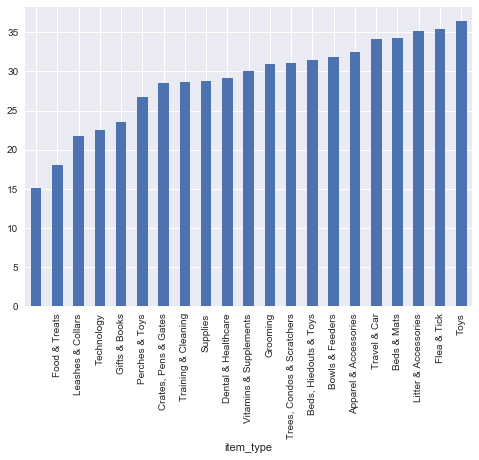

In [440]:
chewy.groupby('item_type')['sale'].median().sort_values().plot.bar()

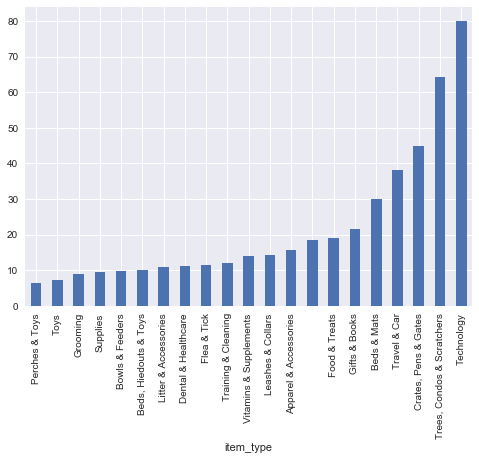

In [441]:
chewy.groupby('item_type')['cost'].median().sort_values().plot.bar()

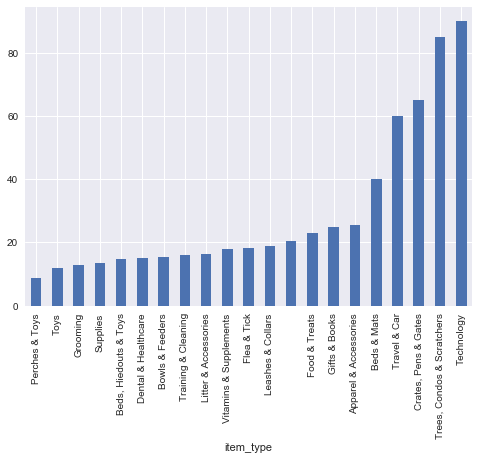

In [442]:
chewy.groupby('item_type')['old_cost'].median().sort_values().plot.bar()

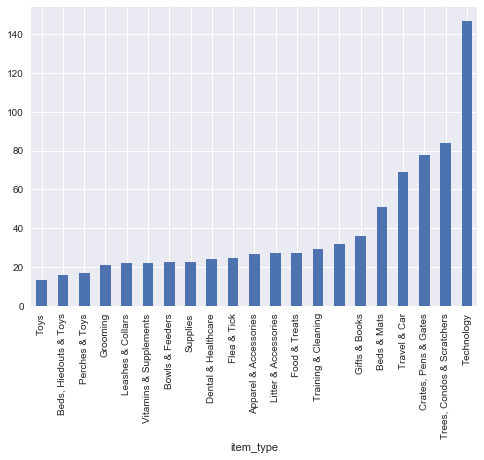

In [443]:
chewy.groupby('item_type')['old_cost'].mean().sort_values().plot.bar()

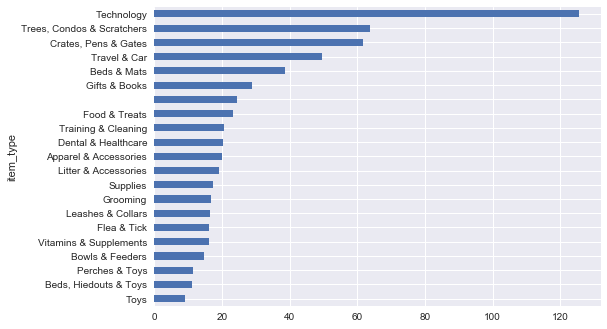

In [445]:
chewy.groupby('item_type')['cost'].mean().sort_values().plot.barh()

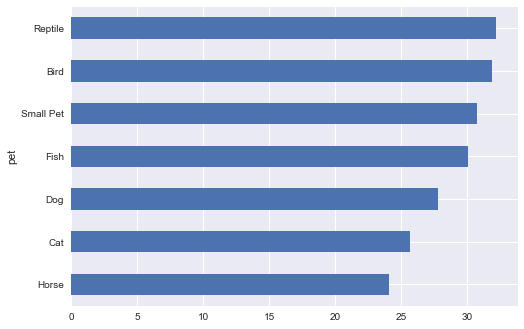

In [448]:
chewy.groupby('pet')['sale'].mean().sort_values().plot.barh()

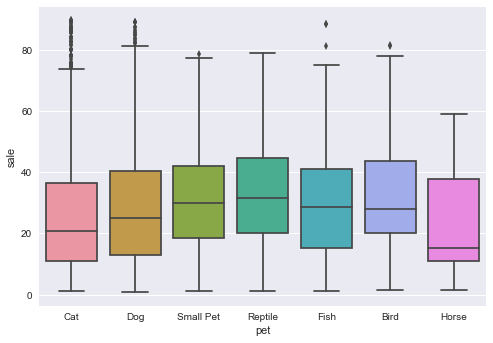

In [453]:
chewy_by_pet = chewy.groupby('pet')

sns.boxplot(x = 'pet', y = 'sale', data = chewy)

ValueError: The number of observations must be larger than the number of variables.

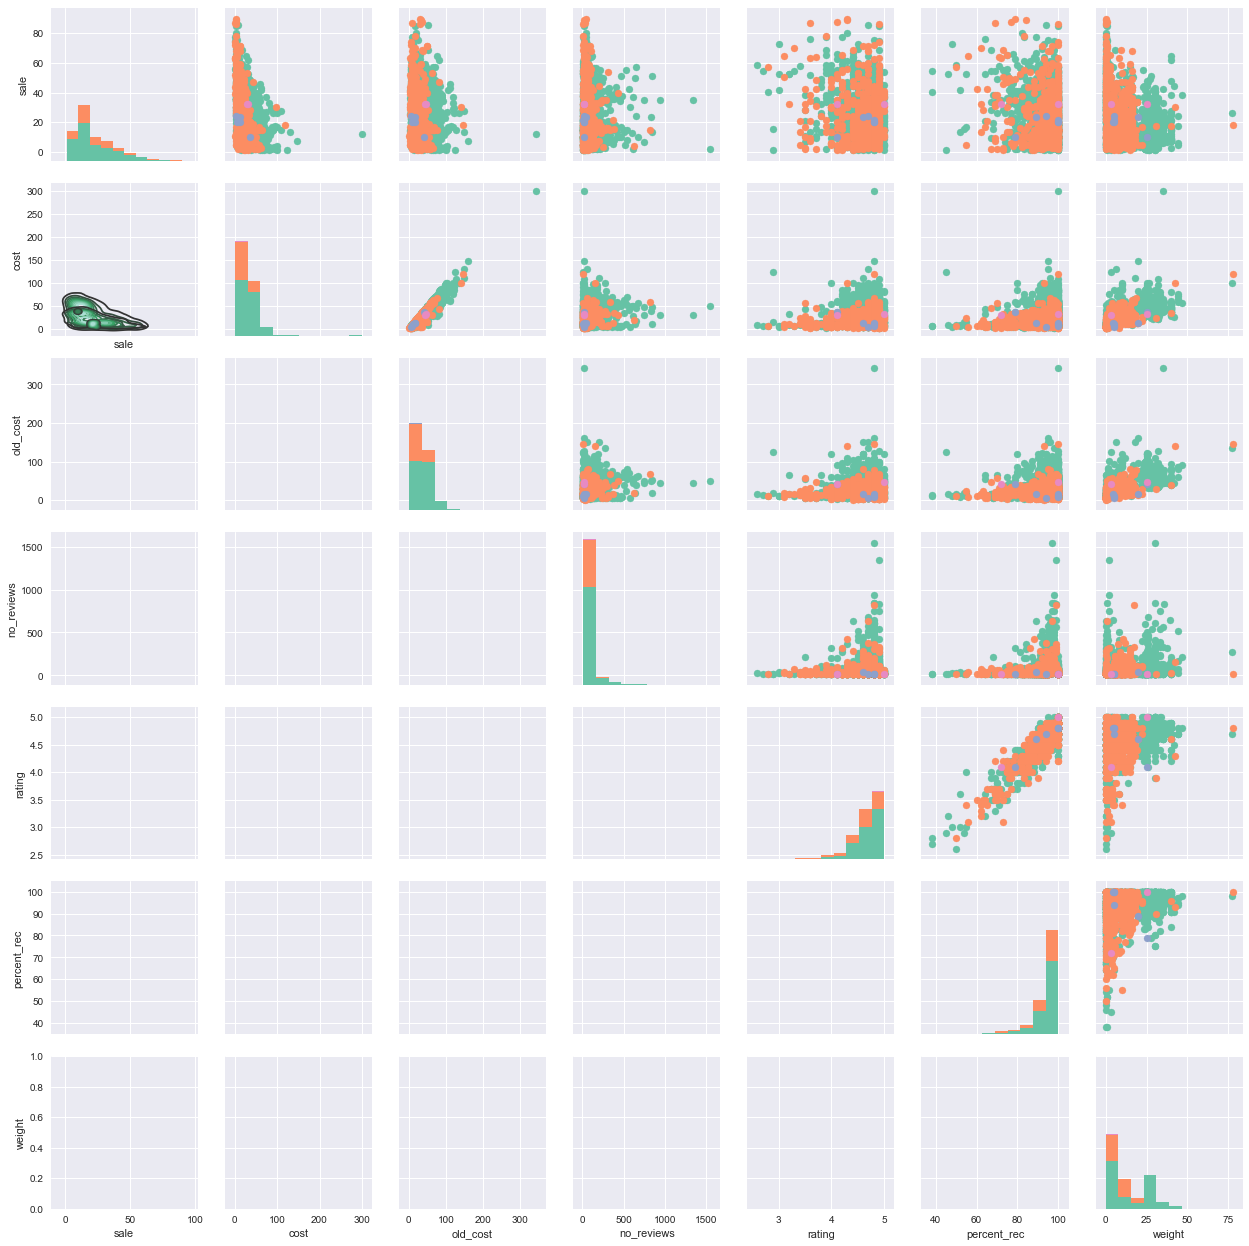

In [474]:
chewy_subset = chewy.ix[:,['pet', 'sale', 'cost', 'old_cost', 'no_reviews', 'rating', 'percent_rec', 'weight']]
g = sns.PairGrid(chewy_subset.dropna(), hue = 'pet', palette='Set2')

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

In [475]:
for key, values in chewy_by_pet:    #because its a tuple, pull out both elements
    print key
    print '-'*55
    print values
    print '\n'

Bird
-------------------------------------------------------
       item_number   pet            category  page               brand  \
11062        94618  Bird  Bird Food & Treats     5  bird_lover's_blend   
11020        94624  Bird  Bird Food & Treats     6  bird_lover's_blend   
11011        94636  Bird  Bird Food & Treats     6  bird_lover's_blend   
10921        94639  Bird  Bird Food & Treats     2  bird_lover's_blend   
11040        94644  Bird  Bird Food & Treats     8  bird_lover's_blend   
10954        94652  Bird  Bird Food & Treats     3  bird_lover's_blend   
10919        94655  Bird  Bird Food & Treats     2  bird_lover's_blend   
10920        94659  Bird  Bird Food & Treats     2  bird_lover's_blend   
10967        94664  Bird  Bird Food & Treats     4  bird_lover's_blend   
11039        94666  Bird  Bird Food & Treats     8  bird_lover's_blend   
10980        94669  Bird  Bird Food & Treats     4  bird_lover's_blend   
11048        94733  Bird  Bird Food & Treats     7 

In [482]:
i = 0
for item in chewy_by_pet:
    print item[0] + ' : ' + str(len(item[1]))
    i += len(item[1])
print 'total pets: ' + str(i)

Bird : 301
Cat : 3653
Dog : 9293
Fish : 340
Horse : 72
Reptile : 168
Small Pet : 362
total pets: 14189


In [484]:
chewy_by_pet.agg(['mean'])

,item_number,page,no_reviews,rating,percent_rec,cost,old_cost,sale,weight
,mean,mean,mean,mean,mean,mean,mean,mean,mean
pet,,,,,,,,,
Bird,99546,4.109635,18.218750,4.499003,92.305648,12.000864,16.417799,31.911081,6.921694
Cat,78723,18.022721,53.988245,4.343717,87.563373,20.675163,25.281537,25.703351,7.168706
Dog,79311,23.252771,63.440377,4.425557,89.482514,23.069242,28.405469,27.831274,11.958860
Fish,99697,6.014706,16.533333,4.642059,95.041176,16.514588,20.621287,30.058845,1.070000
Horse,107753,3.222222,NaN,4.687500,95.972222,24.382500,31.604444,24.058667,3.513519
Reptile,99087,2.809524,14.666667,4.585119,94.333333,9.310774,13.718000,32.218429,0.222500
Small Pet,98644,4.809392,21.442308,4.445580,90.168508,11.806381,16.691304,30.776988,6.292000


In [494]:
chewy.groupby(['pet', 'item_type'])['cost'].agg(['mean', 'count']).sort_values('count')

mean  count
pet       item_type                                    
Dog       Technology                  125.668571      7
Cat       Dental & Healthcare          10.104545     11
          Training & Cleaning           9.396190     21
          Crates, Pens & Gates         40.342727     22
Bird      Perches & Toys               11.566552     29
Cat       Flea & Tick                  17.276667     33
          Beds & Mats                  33.387368     38
          Leashes & Collars            12.953636     44
Small Pet Beds, Hiedouts & Toys        11.236531     49
Cat       Grooming                      8.364423     52
          Bowls & Feeders              12.051346     52
Bird      Supplies                     21.545818     55
Reptile   Food & Treats                 6.340500     60
Dog       Vitamins & Supplements       21.280278     72
Horse                                  24.382500     72
Dog       Apparel & Accessories        20.169359     78
Cat       Trees, Condos & Scratchers   63.718737     95
Fish      Food & Treats                 9.613000    100
Reptile   Supplies                     10.960926    108
Small Pet Supplies                     17.753206    131
Cat       Litter & Accessories         19.231565    147
Dog       Travel & Car                 49.651807    166
          Flea & Tick                  16.054024    169
Small Pet Food & Treats                 7.679396    182
Bird      Food & Treats                 9.639677    217
Fish      Supplies                     19.390250    240
Dog       Beds & Mats                  39.484575    247
          Crates, Pens & Gates         63.556945    275
          Leashes & Collars            16.944129    356
          Bowls & Feeders              15.220335    388
Cat       Vitamins & Supplements       15.281850    427
          Toys                          7.920509    432
Dog       Training & Cleaning          21.094677    434
          Grooming                     17.678491    583
          Dental & Healthcare          20.375203   1159
          Toys                          9.524984   1222
Cat       Food & Treats                22.831330   2279
Dog       Food & Treats                25.515489   4137

In [499]:
chewy.groupby(['brand', 'item_type'])['cost'].mean().sort_values()

brand                 item_type                 
wet_noses             Food & Treats                   1.230000
arm_and_hammer        Training & Cleaning             1.480000
petmate               Food & Treats                   1.490000
tuffy's_pet_food      Dental & Healthcare             2.340000
purina                Litter & Accessories            2.813333
spot                  Crates, Pens & Gates            2.990000
arm_and_hammer        Litter & Accessories            3.185000
marshall              Food & Treats                   3.276667
tetra                 Food & Treats                   3.330000
cat's_pride           Litter & Accessories            3.360000
purina                Toys                            3.362500
synergylabs           Food & Treats                   4.060000
tops_pet_products     Grooming                        4.090000
petmate               Dental & Healthcare             4.240000
coastal_pet_products  Flea & Tick                     4.547500
sergea

In [500]:
chewy.groupby(['brand', 'item_type'])['rating'].mean().sort_values()

brand                               item_type                 
smartcat                            Crates, Pens & Gates          2.000000
spot                                Leashes & Collars             2.000000
synergylabs                         Training & Cleaning           2.400000
the_company_of_animals              Dental & Healthcare           2.900000
chasing_our_tails                   Vitamins & Supplements        3.000000
solvit                              Toys                          3.000000
sunseed                             Toys                          3.150000
overby_farm                         Training & Cleaning           3.300000
smartcat                            Litter & Accessories          3.300000
pioneer_pet                         Training & Cleaning           3.300000
petmate                             Dental & Healthcare           3.400000
wild_calling                        Food & Treats                 3.400000
synergylabs                         F

In [508]:
k = chewy.groupby('brand')['no_reviews'].count()
k.to_csv('k.csv')